Columns before dropping:
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
      Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3 

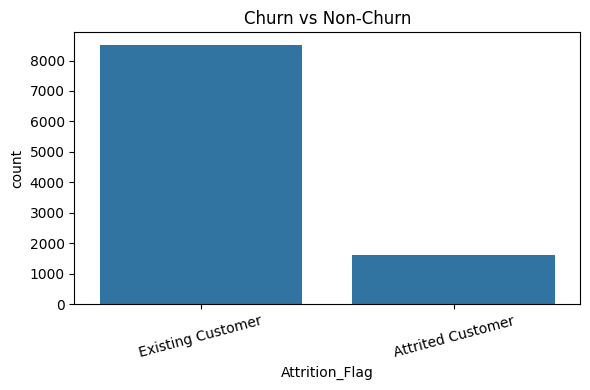

Columns after get_dummies:
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Churn', 'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Education_Level_Unknown', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Unknown', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K', '

In [3]:
# 1_EDA.ipynb

# --------------------------------------------
# 1. IMPORT LIBRARIES
# --------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --------------------------------------------
# 2. LOAD & CLEAN DATA
# --------------------------------------------

# Load dataset
# Load dataset
df = pd.read_csv('../data/BankChurners.csv')

# Print columns to verify which exist
print("Columns before dropping:")
print(df.columns.tolist())

# Drop irrelevant columns if they exist, ignore otherwise
drop_cols = [
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon',
    'Naive_Bayes_Classifier_Attrition_Flag_Income_Category_Age'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')


# Preview
print(df.head())
print(df.info())
print(df['Attrition_Flag'].value_counts())

# --------------------------------------------
# 3. EXPLORATORY DATA ANALYSIS
# --------------------------------------------

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition_Flag')
plt.title("Churn vs Non-Churn")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# --------------------------------------------
# 4. ENCODING & PREPROCESSING
# --------------------------------------------

# Encode target variable
df['Churn'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
df.drop('Attrition_Flag', axis=1, inplace=True)

# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Debug print statements to check columns and data types
print("Columns after get_dummies:")
print(list(df_encoded.columns))
print("\nData types after get_dummies:")
print(df_encoded.dtypes)

# Feature-target split
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler object for later use
import joblib
joblib.dump(scaler, '../models/scaler.save')

# Save the training features column list
joblib.dump(X.columns.tolist(), '../models/train_features.save')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Save processed data (optional for use in next notebook)
np.save('../data/X_train.npy', X_train)
np.save('../data/X_test.npy', X_test)
np.save('../data/y_train.npy', y_train)
np.save('../data/y_test.npy', y_test)
